# binary class with logistic regression
Loss Function for Binary classification

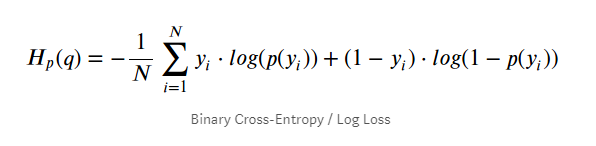

Wall time: 63.8 ms
True 1433 [ 1.15276063 -1.79788915] -0.2751639756406081 0.27962759611924465
accuracy 1.0


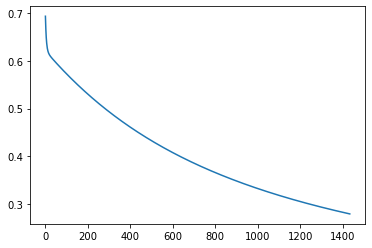

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split

class logistic_regression:
    def __init__(self, learning_rate=0.01, max_iteration=10000, tolerance=1e-4):
        # define initial variables for gradient descent
        self.lr = learning_rate
        self.iter = max_iteration
        self.tol = tolerance
        self.weight = None
        self.bias = None
        self.training_loss_history = []
    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
        self.previous_loss = float('inf')
        self.converge = False
        self.step = 1
        
        # start gradient descent using deriviative cost function
        for _ in range(self.iter):
            y_linear = np.dot(X_train, self.weight) + self.bias
            y_hat = self._sigmoid(y_linear)
            
            # minimize the cost function
            self.current_loss = -1/n_samples * np.sum(y_train*np.log(y_hat)+(1-y_train)*np.log(1-y_hat))
            self.training_loss_history.append(self.current_loss)
            # converge condition to break the iteration
            if abs(self.previous_loss-self.current_loss) < self.tol:
                self.converge = True
                break
            else:
                self.previous_loss = self.current_loss
                
            # deriviative cost function with weight and bias
            dw = (1/n_samples) * np.dot(X_train.T, (y_hat-y_train))
            db = (1/n_samples) * np.sum(y_hat-y_train)
            
            # update weight and bias
            self.weight -= self.lr * dw
            self.bias -= self.lr * db
            
            # record deriviative step
            self.step +=1
            
    def _sigmoid(self, y_linear):
        return 1/(1+np.exp(-y_linear))
    
    def predict(self, X_test):
        y_test_pred_linear = np.dot(X_test, self.weight) + self.bias
        y_test_pred = self._sigmoid(y_test_pred_linear)
        y_test_pred_class = [1 if i>0.5 else 0 for i in y_test_pred]
        return np.array(y_test_pred_class)
    
    def evaluation(self, y_pred, y_test):
        accuracy = np.sum(y_pred==y_test)/len(y_test)
        return accuracy

    
if __name__ == "__main__":
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = (iris.target != 0) * 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    LogReg_model = logistic_regression()
    %time LogReg_model.fit(X_train, y_train)
    y_pred = LogReg_model.predict(X_test)
    accuracy = LogReg_model.evaluation(y_pred, y_test)
    print(LogReg_model.converge, LogReg_model.step, LogReg_model.weight, LogReg_model.bias, LogReg_model.current_loss)
    print("accuracy", accuracy)
    plt.plot(
        range(1, LogReg_model.step + 1),
        LogReg_model.training_loss_history,
        label='Training Loss')

# linear regression 
`Loss function for linear regression:`

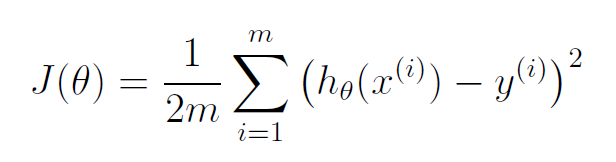

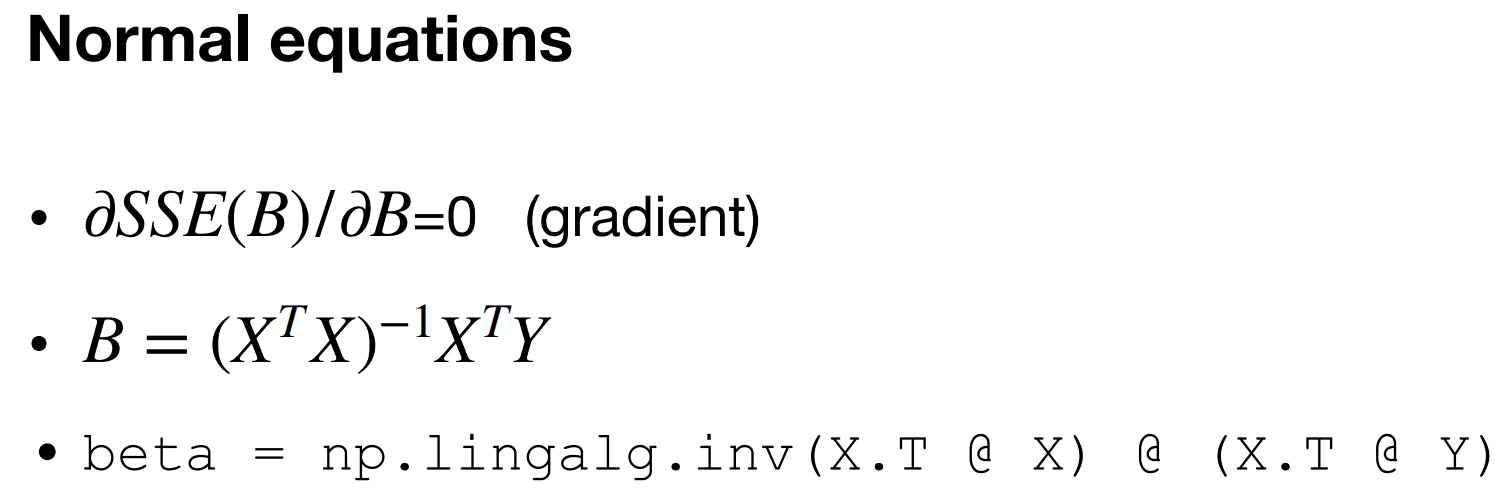

`correlation/r :`

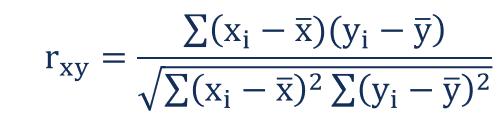

`r square formula:`

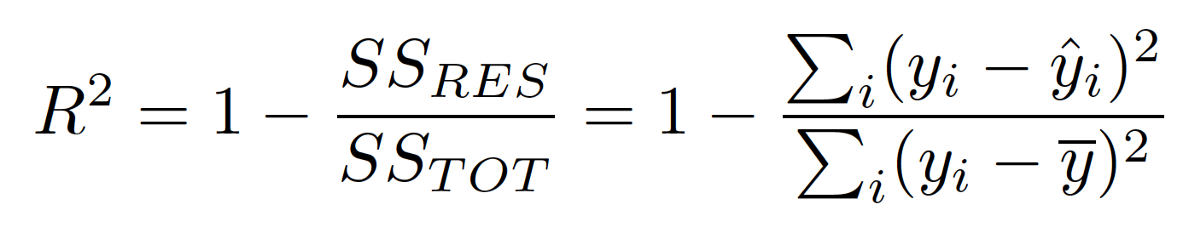

In [3]:
# estimate via gradient descent
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

class linear_regression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw  = 1/n_samples * np.dot(X.T, (y_predicted-y))
            db = 1/n_samples * np.sum(y_predicted-y)
            
            #updated parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self, X):
        y_estimate = np.dot(X, self.weights) + self.bias
        return y_estimate

if __name__ == "__main__":
    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true-y_pred)**2)
    
    def r2_score(y_true, y_pred):
        corr_matrix = np.corrcoef(y_true, y_pred)
        corr = corr_matrix[0,1]
        return corr**2

    X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    linear_R_model = linear_regression(learning_rate=0.01, n_iters=1000)
    linear_R_model.fit(X_train, y_train)
    y_pred = linear_R_model.predict(X_test)
    
    print('weight', linear_R_model.weights)
    print('bias', linear_R_model.bias)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE", mse)
    print("RMSE", np.sqrt(mse))
    
    accuracy = r2_score(y_test, y_pred)
    print("r2:", accuracy)

weight [ 7.89521686 52.74318655 34.63732868 25.25202704 24.34192961]
bias 2.2319711097396207
MSE 359.509716047183
RMSE 18.9607414424432
r2: 0.9538303213185516


In [11]:
# directly compute weight and bias with formula
def stat_weights(X, y):
    X = np.insert(X, 0, 1, axis=1)
    beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
    weights = beta[1:]
    bias = beta[0]
    return weights, bias

weights, bias = stat_weights(X, y)
y_hat = np.dot(X, weights) + bias
SSE = ((y_hat-y) **2).sum()
mse = SSE/len(y)
RegSS = ((y_hat-y.mean())**2).sum()
TSS = RegSS + SSE
r2 = RegSS/TSS

n_samples, n_features = X.shape
SE_y_hat = np.sqrt(SSE/(n_samples-n_features-1))/np.sqrt(n_samples)
F = (RegSS / n_features) / (RegSS/(n_samples-n_features-1))
print('weights', weights)
print('bias', bias)
print('mse', mse)
print('r2', r2)
print('corr', np.sqrt(r2))
print('SE_y_hat', SE_y_hat)
print('F_statistic', F)

weights [ 8.84423441 52.4612103  35.66363469 26.77249943 24.34061228]
bias 1.9439796476163043
mse 344.3927811018241
r2 0.9402705426004103
corr 0.9696754831387717
SE_y_hat 1.9140932554201577
F_statistic 18.799999999999997


In [6]:
# using statsmodel to find the result
import statsmodels.api as sm
def sm_model(X, y):
    X = sm.add_constant(X, prepend=False)
    mod = sm.OLS(y, X)
    res = mod.fit()
    return res

res = sm_model(X, y)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           6.97e-56
Time:                        17:28:01   Log-Likelihood:                -433.98
No. Observations:                 100   AIC:                             880.0
Df Residuals:                      94   BIC:                             895.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.8442      1.912      4.626      0.0